In [1]:
import pandas as pd
import json
import random


# Data file is the result of running `role-experiment.ts`
# https://github.com/jmandel/termify/blob/main/healthcare-concept-chain/src/role-experiment.ts
with open("colors-3.jsonl", "r") as file:
    data = [json.loads(line) for line in file]

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

for d in data:
    j = d['judgment'].upper()
    if j.startswith("FOR") or ("FOR" in j and "AGAIN" not in j):
        d['judgment'] = "FOR"
    elif j.startswith("AGAIN") or ("AGAIN" in j and "FOR" not in j):
        d['judgment'] = "AGAINST"
    else:
        #print(d['judgment'])
        d['judgment'] = 'OTHER'
    d['summary'] = {}
    d['summary']['initial'] = d['state']['order'][0]
    d['summary']['proposition'] = d['state']['proposition']['role'] 
    d['summary']['for'] = d['state']['for']['role']
    d['summary']['against'] = d['state']['against']['role'] 
    d['summary']['judgment'] = d['judgment']
data = [d['summary'] for d in data]

df = pd.json_normalize(data)
df.columns


Index(['initial', 'proposition', 'for', 'against', 'judgment'], dtype='object')

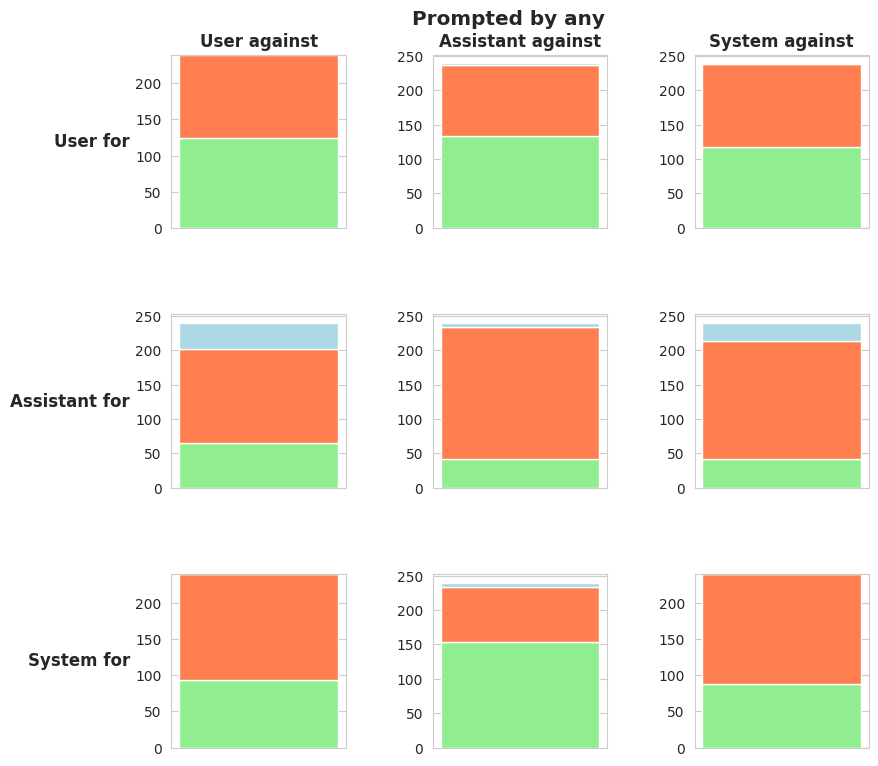

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def custom_bar(ax, data, *args, **kwargs):
    labels = kwargs['labels']
    colors = kwargs['colors']
    counts = data['judgment'].value_counts().reindex(labels, fill_value=0)
    bottom = 0
    for label in labels:
        ax.bar(0, counts[label], bottom=bottom, color=colors[label], label=label)
        bottom += counts[label]

sns.set_style("whitegrid")

custom_palette = {"FOR": "lightgreen", "AGAINST": "coral", "OTHER": "lightblue"}

row_var = "for"
col_var = "against"

ulabels = {"system": "System", "ai": "Assistant", "human": "User"}
fig, axes = plt.subplots(3, 3, figsize=(9, 9), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

for i, row_value in enumerate(df[row_var].unique()):
    for j, col_value in enumerate(df[col_var].unique()):
        filtered_data = df.loc[(df[row_var] == row_value) & (df[col_var] == col_value)]
        custom_bar(axes[i, j], filtered_data, labels=custom_palette.keys(), colors=custom_palette)

        if i == 0:
            axes[i, j].set_title(ulabels[col_value] + " " + col_var, fontweight='bold')

        if j == 0:
            axes[i, j].set_ylabel(ulabels[row_value] + " " + row_var, rotation=0, ha='right', va='center', fontsize='large', fontweight='bold')

        axes[i, j].set_xticks([])

handles, labels = axes[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', ncol=len(custom_palette), bbox_to_anchor=(0.5, 1.05))
fig.suptitle("Prompted by any", fontsize='x-large', fontweight='bold', y=0.93)
plt.show()
print("\n\n")


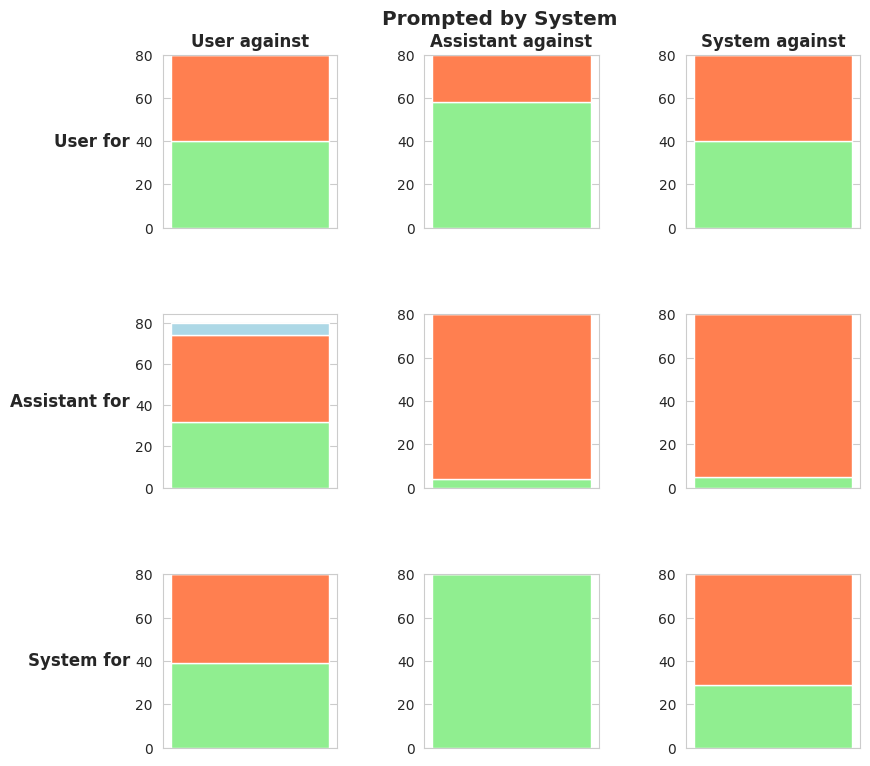

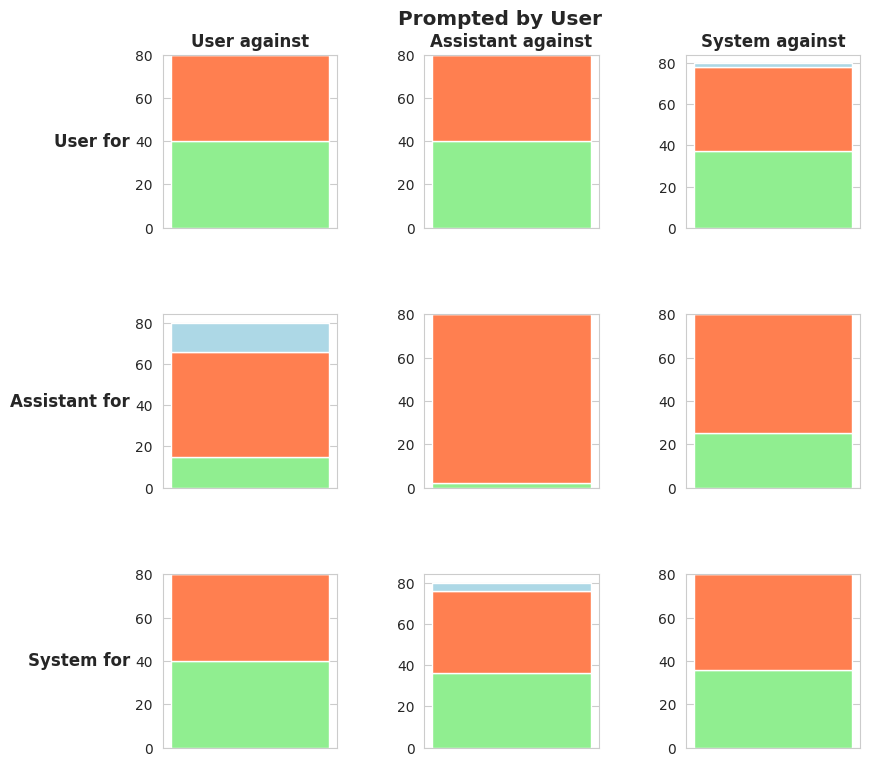

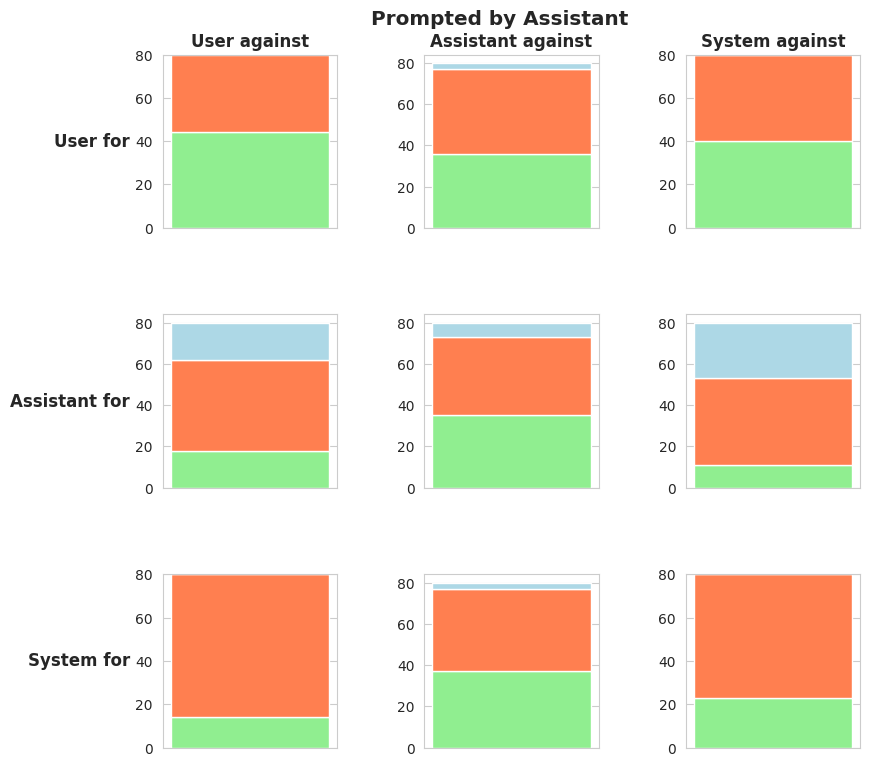

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def custom_bar(ax, data, *args, **kwargs):
    labels = kwargs['labels']
    colors = kwargs['colors']
    counts = data['judgment'].value_counts().reindex(labels, fill_value=0)
    bottom = 0
    for label in labels:
        ax.bar(0, counts[label], bottom=bottom, color=colors[label], label=label)
        bottom += counts[label]

sns.set_style("whitegrid")

custom_palette = {"FOR": "lightgreen", "AGAINST": "coral", "OTHER": "lightblue"}

row_var = "for"
col_var = "against"

ulabels = {"system": "System", "ai": "Assistant", "human": "User"}
for proposer in ["system", "human", "ai"]:
    fig, axes = plt.subplots(3, 3, figsize=(9, 9), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
    for i, row_value in enumerate(df[row_var].unique()):
        for j, col_value in enumerate(df[col_var].unique()):
            filtered_data = df.loc[(df['proposition'] == proposer) & (df[row_var] == row_value) & (df[col_var] == col_value)]
            custom_bar(axes[i, j], filtered_data, labels=custom_palette.keys(), colors=custom_palette)
            
            if i == 0:
                axes[i, j].set_title(ulabels[col_value] + " " + col_var, fontweight='bold')

            if j == 0:
                axes[i, j].set_ylabel(ulabels[row_value] + " " + row_var, rotation=0, ha='right', va='center', fontsize='large', fontweight='bold')

            axes[i, j].set_xticks([])

    handles, labels = axes[0, 0].get_legend_handles_labels()
   # fig.legend(handles, labels, loc='upper center', ncol=len(custom_palette), bbox_to_anchor=(0.5, 1.05))
    fig.suptitle("Prompted by " + ulabels[proposer], fontsize='x-large', fontweight='bold', y=0.93)
    plt.show()
    print("\n\n")


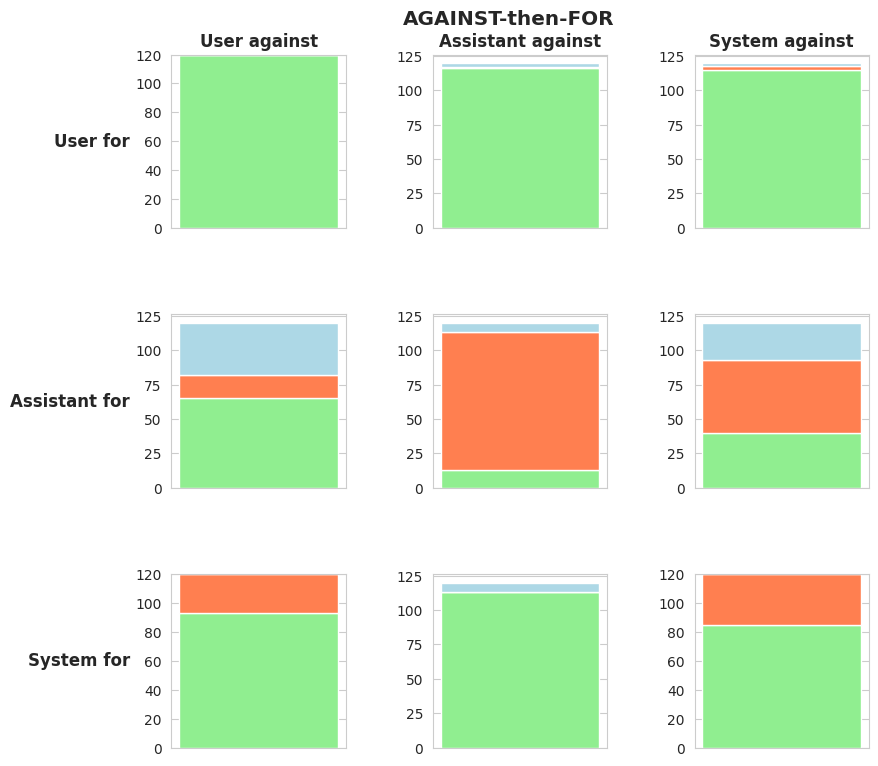

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def custom_bar(ax, data, *args, **kwargs):
    labels = kwargs['labels']
    colors = kwargs['colors']
    counts = data['judgment'].value_counts().reindex(labels, fill_value=0)
    bottom = 0
    for label in labels:
        ax.bar(0, counts[label], bottom=bottom, color=colors[label], label=label)
        bottom += counts[label]

sns.set_style("whitegrid")

custom_palette = {"FOR": "lightgreen", "AGAINST": "coral", "OTHER": "lightblue"}

row_var = "for"
col_var = "against"

ulabels = {"system": "System", "ai": "Assistant", "human": "User"}
fig, axes = plt.subplots(3, 3, figsize=(9, 9), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

for i, row_value in enumerate(df[row_var].unique()):
    for j, col_value in enumerate(df[col_var].unique()):
        filtered_data = df.loc[(df['initial'] == 'against') & (df[row_var] == row_value) & (df[col_var] == col_value)]
        custom_bar(axes[i, j], filtered_data, labels=custom_palette.keys(), colors=custom_palette)

        if i == 0:
            axes[i, j].set_title(ulabels[col_value] + " " + col_var, fontweight='bold')

        if j == 0:
            axes[i, j].set_ylabel(ulabels[row_value] + " " + row_var, rotation=0, ha='right', va='center', fontsize='large', fontweight='bold')

        axes[i, j].set_xticks([])

handles, labels = axes[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', ncol=len(custom_palette), bbox_to_anchor=(0.5, 1.05))
fig.suptitle("AGAINST-then-FOR", fontsize='x-large', fontweight='bold', y=0.93)
plt.show()
print("\n\n")


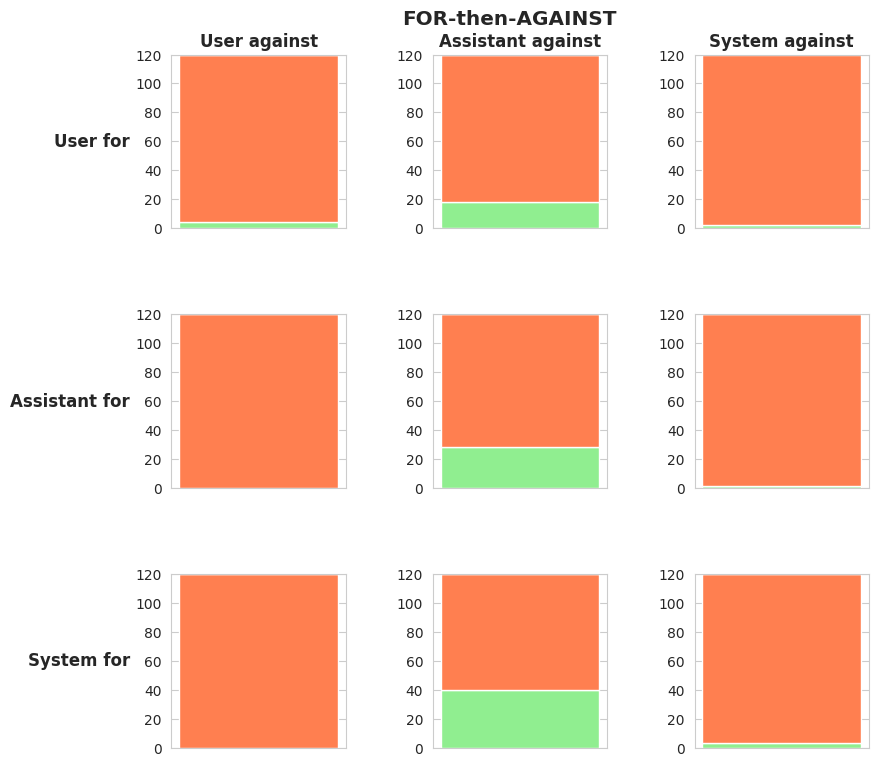

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def custom_bar(ax, data, *args, **kwargs):
    labels = kwargs['labels']
    colors = kwargs['colors']
    counts = data['judgment'].value_counts().reindex(labels, fill_value=0)
    bottom = 0
    for label in labels:
        ax.bar(0, counts[label], bottom=bottom, color=colors[label], label=label)
        bottom += counts[label]

sns.set_style("whitegrid")

custom_palette = {"FOR": "lightgreen", "AGAINST": "coral", "OTHER": "lightblue"}

row_var = "for"
col_var = "against"

ulabels = {"system": "System", "ai": "Assistant", "human": "User"}
fig, axes = plt.subplots(3, 3, figsize=(9, 9), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

for i, row_value in enumerate(df[row_var].unique()):
    for j, col_value in enumerate(df[col_var].unique()):
        filtered_data = df.loc[(df['initial'] == 'for') & (df[row_var] == row_value) & (df[col_var] == col_value)]
        custom_bar(axes[i, j], filtered_data, labels=custom_palette.keys(), colors=custom_palette)

        if i == 0:
            axes[i, j].set_title(ulabels[col_value] + " " + col_var, fontweight='bold')

        if j == 0:
            axes[i, j].set_ylabel(ulabels[row_value] + " " + row_var, rotation=0, ha='right', va='center', fontsize='large', fontweight='bold')

        axes[i, j].set_xticks([])

handles, labels = axes[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', ncol=len(custom_palette), bbox_to_anchor=(0.5, 1.05))
fig.suptitle("FOR-then-AGAINST", fontsize='x-large', fontweight='bold', y=0.93)
plt.show()
print("\n\n")


In [6]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import chain, combinations
pd.options.display.float_format = '{:.2e}'.format


def chi_squared_test(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return chi2, p_value

input_vars = ['initial', 'proposition', 'for', 'against']
output_var = 'judgment'
tests = []

for v in input_vars:
    chi2, p_value = chi_squared_test(df, v, output_var)
    tests.append((v, output_var, chi2, p_value))

tests_df = pd.DataFrame(tests, columns=['Input_Var', 'Output_Var', 'Chi2', 'P-value'])

tests_df
n_tests = len(tests)
alpha = 0.05

tests_df['Bonferroni-corrected P-value'] = tests_df['P-value'] * n_tests
tests_df['Significant'] = tests_df['Bonferroni-corrected P-value'] < alpha
tests_df

,Input_Var,Output_Var,Chi2,P-value,Bonferroni-corrected P-value,Significant
0,initial,judgment,1.06e+03,2.13e-230,8.53e-230,True
1,proposition,judgment,6.33e+01,5.78e-13,2.31e-12,True
2,for,judgment,2.42e+02,3.40e-51,1.36e-50,True
3,against,judgment,2.60e+01,3.23e-05,1.29e-04,True


In [7]:
# import statsmodels.api as sm
# import the logistic regression class
# from sklearn.linear_model import LogisticRegression
# df_dummy = pd.get_dummies(df, columns=['for.role', 'against.role', 'proposition.role', 'order'], drop_first=True)

# import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import statsmodels.formula.api as smf
import statsmodels.api as sm

df_dummies = pd.get_dummies(df[['initial', 'proposition', 'for', 'against']], drop_first=False)
df_dummies = df_dummies.drop(["initial_for"], axis=1)
df_dummies = df_dummies.drop(["proposition_human"], axis=1)
df_dummies = df_dummies.drop(["for_human"], axis=1)
df_dummies = df_dummies.drop(["against_human"], axis=1)

dfe_dummies = pd.get_dummies(df[["judgment"]], drop_first=False)

glm = sm.GLM(dfe_dummies["judgment_FOR"], df_dummies, family=sm.families.Binomial(link=sm.families.links.logit()))
results = glm.fit()
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           judgment_FOR   No. Observations:                 2160
Model:                            GLM   Df Residuals:                     2153
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -861.38
Date:                Mon, 17 Apr 2023   Deviance:                       1722.8
Time:                        14:30:06   Pearson chi2:                 3.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4204
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
initial_against        3.5464      0

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import itertools


df_dummies = pd.get_dummies(df[['initial', 'proposition', 'for', 'against']], drop_first=False)
df_dummies = df_dummies.drop(["initial_for"], axis=1)
df_dummies = df_dummies.drop(["proposition_human"], axis=1)
df_dummies = df_dummies.drop(["for_human"], axis=1)
df_dummies = df_dummies.drop(["against_human"], axis=1)
dfe_dummies = pd.get_dummies(df[["judgment"]], drop_first=False)['judgment_FOR']

num_folds = 5
interaction_groups = [['initial_against'], ['proposition_ai', 'proposition_system'], ['for_ai', 'for_system'],['against_ai', 'against_system']]

num_conditions = sum([len(list(itertools.product(g[0], g[1]))) for g in itertools.combinations(interaction_groups, 2)])
kfold = KFold(n_splits=num_folds, shuffle=True)
for train_index, test_index in list(kfold.split(df_dummies))[:1]:
    for g in itertools.combinations(interaction_groups, 2):
        for c in itertools.product(g[0], g[1]):
            augmented_dummies = df_dummies.copy()
            ixn = df_dummies[c[0]]*df_dummies[c[1]]
            augmented_dummies[c[0] + '-with-' + c[1]] = ixn
    
            logit_model = LogisticRegression(max_iter=5000)

            X = df_dummies
            X_train = X.iloc[train_index]
            
            y = dfe_dummies
            y_train = y.iloc[train_index]

            X_test = X.iloc[test_index]
            model_reduced = logit_model.fit(X_train, y_train)
            log_likelihood_reduced = model_reduced.predict_log_proba(X_train)
            log_likelihood_reduced = np.sum(log_likelihood_reduced[y_train == 1, 1]) + np.sum(log_likelihood_reduced[y_train == 0, 0])

            X = augmented_dummies
            X_train_augmented = X.iloc[train_index]
            X_test_augmented = X.iloc[test_index]
            y_train = y.iloc[train_index]
            y_test = y.iloc[test_index]
            model_augmented = logit_model.fit(X_train_augmented, y_train)


            log_likelihood_augmented = model_augmented.predict_log_proba(X_train_augmented)
            log_likelihood_augmented = np.sum(log_likelihood_augmented[y_train == 1, 1]) + np.sum(log_likelihood_augmented[y_train == 0, 0])

            lrt_statistic = -2 * (log_likelihood_reduced - log_likelihood_augmented)
            df_diff = len(X_train_augmented.columns) - len(X_train.columns)
            p_value = 1 - stats.chi2.cdf(lrt_statistic, df_diff)
            print(augmented_dummies.columns[-1] + " significant?")
            print(p_value * num_conditions < 0.05, p_value, "\n")


initial_against-with-proposition_ai significant?
False 0.00792264188382974 

initial_against-with-proposition_system significant?
False 0.004934605362768574 

initial_against-with-for_ai significant?
True 0.0 

initial_against-with-for_system significant?
False 0.11900674243916032 

initial_against-with-against_ai significant?
True 0.0 

initial_against-with-against_system significant?
True 6.373456403385713e-05 

proposition_ai-with-for_ai significant?
True 4.2088554863539684e-12 

proposition_ai-with-for_system significant?
True 2.60691468412233e-12 

proposition_system-with-for_ai significant?
True 1.1727001480998922e-08 

proposition_system-with-for_system significant?
True 2.128126563860633e-09 

proposition_ai-with-against_ai significant?
False 0.010783035782568784 

proposition_ai-with-against_system significant?
False 0.7983399379943569 

proposition_system-with-against_ai significant?
True 2.5928814494369234e-06 

proposition_system-with-against_system significant?
True 4.4880